<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="center">

# Group Project
#### Arnaud Guzman-Annès | ID: 260882529
#### Ram Babu | ID: XXXXXXX
#### Sophie Courtemanche-Martel | ID: XXXXXXX
#### Duncan Wang | ID: XXXXXXX
#### Jules Zielinski | ID: XXXXXXX
<br><br>
**Date: February 22nd, 2021**
<br><br>
## Objective:

TED talks are video recordings of influential talks given at and hosted by TED Conferences LLC. TED was founded in 1984, and has since built a reputation for spreading inspiring powerful ideas in fields ranging from tech to science to education, with its videos having garnered over 1 billion views to date.

The goal of this project is to use various features associated with TED talks -- such as the topic, speaker, conference year, and length of the talk -- to predict the number of views a TED talk may receive.


# Data preprocessing

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed as well as Scikit-Learn (V ≥0.20).

In [22]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

## From GitHub repository

In [23]:
import pandas as pd
import requests
import io
    
# Downloading the csv file from my GitHub account
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/TED/main/data/ted_main.csv"

download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
# We will use "churn" instead of "df" for replication purposes
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Data preprocesing

## About the dataset

* **name:** The official name of the TED Talk. Includes the title and the speaker.
* **title:** The title of the talk
* **description:** A blurb of what the talk is about.
* **main_speaker:** The first named speaker of the talk.
* **speaker_occupation:** The occupation of the main speaker.
* **num_speaker:** The number of speakers in the talk.
* **duration:** The duration of the talk in seconds.
* **event:** The TED/TEDx event where the talk took place.
* **film_date:** The Unix timestamp of the filming.
* **published_date:** The Unix timestamp for the publication of the talk on TED.com
* **comments:** The number of first level comments made on the talk.
* **tags:** The themes associated with the talk.
* **languages:** The number of languages in which the talk is available.
* **ratings:** A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* **related_talks:** A list of dictionaries of recommended talks to watch next.
* **url:** The URL of the talk.
* **views:** The number of views on the talk.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [25]:
# Reorganize the columns for a better visualization

df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [26]:
# Some more information about the dataset

display(df.shape)
display(df.isnull().sum())
display(df.describe())

(2550, 17)

,num_speaker,duration,film_date,published_date,comments,languages,views
count,2550.000000,2550.000000,2.550000e+03,2.550000e+03,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,1.321928e+09,1.343525e+09,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,1.197391e+08,9.464009e+07,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,7.464960e+07,1.151367e+09,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,1.257466e+09,1.268463e+09,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,1.333238e+09,1.340935e+09,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,1.412964e+09,1.423432e+09,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,1.503792e+09,1.506092e+09,6404.000000,72.000000,4.722711e+07


name                  0
title                 0
description           0
main_speaker          0
speaker_occupation    6
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
comments              0
tags                  0
languages             0
ratings               0
related_talks         0
url                   0
views                 0
dtype: int64

## Observations

- There are 2550 rows and 17 columns.
- `speaker_occupation` column have 6 missing values.

In [46]:
# Since there is just 6 incomplete observation lets drop them.

df = df.dropna()
display(df.shape)
display(df.isnull().sum())

(2544, 17)

name                  0
title                 0
description           0
main_speaker          0
speaker_occupation    0
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
comments              0
tags                  0
languages             0
ratings               0
related_talks         0
url                   0
views                 0
dtype: int64

In [27]:
# Convert timestamp film_date and published_date into readable format

import datetime

df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

# Exploratory Data Analysis (EDA)

# (work in progress)

Lets perform some basic data analysis. First, lets analyse if there is any correlation. 

********************************************************
For this the following informations will be displayed:

* XXX
* XXX
* XXX

,views,comments,duration
views,1.000000,0.530897,0.048489
comments,0.530897,1.000000,0.140507
duration,0.048489,0.140507,1.000000


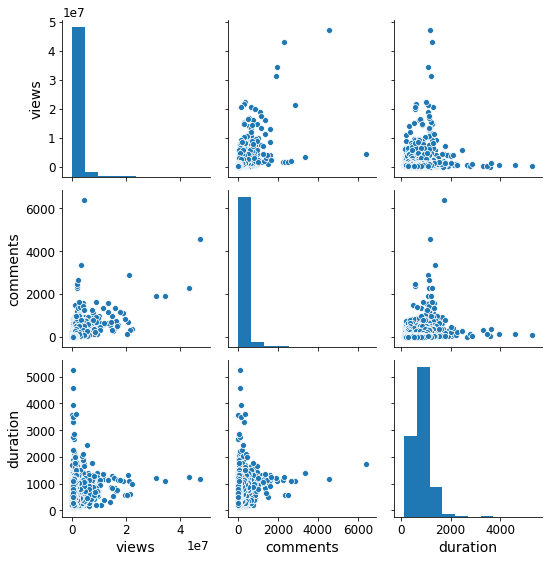

In [44]:
import seaborn as sns
from seaborn import pairplot

sns.pairplot(data=df, vars=["views", "comments", "duration"])
display(df[["views", "comments", "duration"]].corr())